# Stackoverflow Survey Analysis

This Jupyter Notebook will go through the complete analysis of the Stackoverflow Survey

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
survey_results = pd.read_csv('survey_results_public.csv')

In [4]:
survey_results.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for column in survey_results.columns:
    print(column)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

## Countries Represented

First let's have a look at the represented countries.

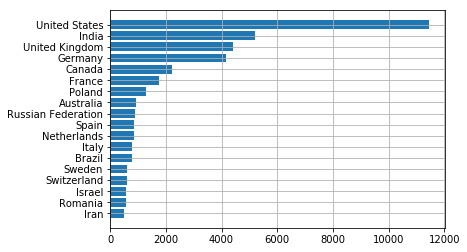

In [6]:
countries = survey_results['Country'].value_counts()
x_vals = list(countries.index)
y_vals = list(countries.values)

THRESH = 500

x_vals = [x for (x,y) in zip(x_vals, y_vals) if y > THRESH]
y_vals = [y for y in y_vals if y > THRESH]

plt.barh(range(0,len(x_vals)), y_vals[::-1]);
plt.yticks(range(0,len(x_vals)), x_vals[::-1]);
plt.grid()

United States is heavily represented, however followed by a large number of other survey participants. Given the pupulation of the United States, it is rather underrepresented in the survey. However, the amount of data allows to look at the different answering behaviors.

In [7]:
survey_results['years_coded'] = [float(str(x).split(' ')[0]) if str(x).split(' ')[0] != 'Less' else 0.0 for x in survey_results['YearsCodedJob']]

In [8]:
us_data = survey_results[survey_results['Country'] == 'United States']
rest_data = survey_results[survey_results['Country'] != 'United States']

In [9]:
selected_columns = [
    'ProgramHobby',
    'EmploymentStatus',
    'FormalEducation',
    'Salary',
    'ExpectedSalary',
    'JobSatisfaction',
    'JobSatisfaction',
    'years_coded'
]

us_data[selected_columns].describe()

,Salary,ExpectedSalary,JobSatisfaction,JobSatisfaction,years_coded
count,3781.000000,468.000000,9322.000000,9322.000000,9422.000000
mean,96194.754635,68535.918544,7.178502,7.178502,8.150287
std,34866.067035,24657.176399,2.134391,2.134391,6.775606
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,70000.000000,55000.000000,6.000000,6.000000,2.000000
50%,93000.000000,70000.000000,8.000000,8.000000,6.000000
75%,120000.000000,80000.000000,9.000000,9.000000,14.000000
max,197000.000000,180000.000000,10.000000,10.000000,20.000000


In [10]:
us_data[selected_columns].head()

,ProgramHobby,EmploymentStatus,FormalEducation,Salary,ExpectedSalary,JobSatisfaction,JobSatisfaction,years_coded
0,"Yes, both","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN
3,"Yes, both",Employed full-time,Doctoral degree,NaN,NaN,3.0,3.0,9.0
6,"Yes, both",Employed full-time,Master's degree,NaN,NaN,6.0,6.0,8.0
10,"Yes, I program as a hobby",Employed full-time,Bachelor's degree,NaN,NaN,9.0,9.0,11.0
15,"Yes, I program as a hobby","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,NaN,8.0,8.0,1.0


In [11]:
rest_data[selected_columns].describe()

,Salary,ExpectedSalary,JobSatisfaction,JobSatisfaction,years_coded
count,9110.000000,2098.000000,31054.000000,31054.000000,31468.000000
mean,39739.994145,25246.962746,6.890610,6.890610,6.125334
std,28483.394768,25209.452116,2.173173,2.173173,5.658561
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17204.301075,2803.787768,6.000000,6.000000,2.000000
50%,37634.408602,19354.838710,7.000000,7.000000,4.000000
75%,56250.000000,39736.899723,8.000000,8.000000,9.000000
max,193750.000000,187500.000000,10.000000,10.000000,20.000000


We cannot see a lot of different until now, maybe it's more interesting if we join some additional data, like the OECD average salary information.

In [12]:
salary_data = pd.read_excel('salaries.xlsx', 'Salaries')
salary_data.head()

,Country,Average Salary
0,Australia,61620.416757
1,Austria,48305.521230
2,Belgium,49419.217990
3,Canada,50032.728193
4,Chile,18645.056281


In [13]:
salary_data['Country'] = salary_data['Country'].astype(str)
survey_results['Country'] = survey_results['Country'].astype(str)
survey_results_enriched = pd.merge(survey_results, salary_data, on=['Country'], how='left')
survey_results_enriched[['Country', 'Average Salary']].describe()

,Average Salary
count,35699.000000
mean,48210.556672
std,15003.265038
min,8592.534240
25%,44466.304646
50%,48305.521230
75%,60558.358120
max,90661.520643


Let's filter for the countries where we have average salary information

In [14]:
print('No. results before filtering: {}'.format(survey_results_enriched.shape[0]))
survey_results_enriched = survey_results_enriched.dropna(subset=['Average Salary'])
print('No. results after filtering: {}'.format(survey_results_enriched.shape[0]))

No. results before filtering: 51392
No. results after filtering: 35699


We lose a decent amount of information, but still keep a viable amount. Let's see if we can find some outliers.

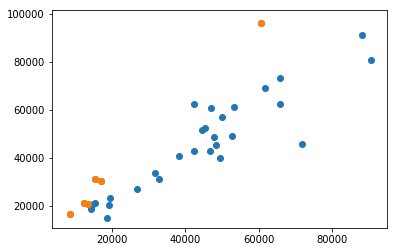

In [15]:
survey_results_aggregate_salary = survey_results_enriched.groupby('Country').mean()

plt.scatter(survey_results_aggregate_salary['Average Salary'], survey_results_aggregate_salary['Salary'])

survey_results_aggregate_salary['Salary Multiplier'] = [x/y for (x,y) in zip(
                                survey_results_aggregate_salary['Salary'],
                                survey_results_aggregate_salary['Average Salary'])]

survey_results_aggregate_salary_outlier = survey_results_aggregate_salary[[(x or y) for (x,y) in zip(
                            (survey_results_aggregate_salary['Salary Multiplier']>1.5),
                            (survey_results_aggregate_salary['Salary Multiplier']<0.5))]]

plt.scatter(survey_results_aggregate_salary_outlier['Average Salary'], survey_results_aggregate_salary_outlier['Salary'])

In [16]:
survey_results_aggregate_salary_outlier.index

Index(['Estonia', 'Hungary', 'Latvia', 'Mexico', 'Poland', 'United States'], dtype='object', name='Country')

We can see that there are several countries which earn more or less than usual compared to other countries in that field of work.

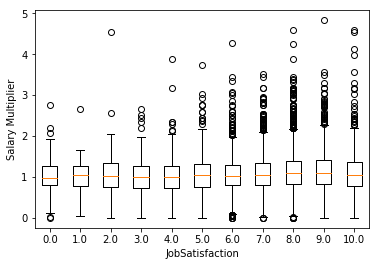

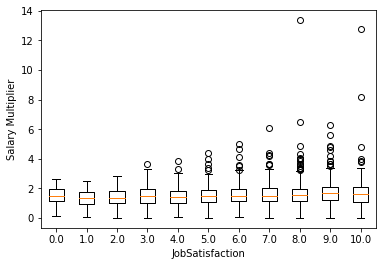

In [85]:
survey_results_enriched['Salary Multiplier'] = [x/y for (x,y) in zip(
                                survey_results_enriched['Salary'],
                                survey_results_enriched['Average Salary'])]

survey_results_enriched = survey_results_enriched[survey_results_enriched['Salary Multiplier'] > 0.0]
survey_results_outliers = survey_results_enriched[survey_results_enriched['Country'].isin(
                                list(survey_results_aggregate_salary_outlier.index))]

survey_results_inliers = survey_results_enriched[~survey_results_enriched['Country'].isin(
                                list(survey_results_aggregate_salary_outlier.index))]

def print_boxplots(df, x_column, y_column):
    plt.figure()
    
    df = df.dropna(subset=[x_column, y_column])
    x_vals = list(set(df[x_column].values))
    
    y_arr = []
    x_vals_arr = []
    replace_str = False
    for i, x_val in enumerate(x_vals):
        if type(x_val) is str:
            x_vals_arr.append(i)
            replace_str = True
        else:
            x_vals_arr.append(x_val)
        y_arr.append(list(
            df[df[x_column] == x_val][y_column].values))
        
    plt.boxplot(
        y_arr,
        positions=x_vals_arr);
    if replace_str:
        plt.xticks(x_vals_arr, x_vals)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    

print_boxplots(survey_results_inliers, 'JobSatisfaction', 'Salary Multiplier')
print_boxplots(survey_results_outliers, 'JobSatisfaction', 'Salary Multiplier')

If we compare the results, we can see, that the salary compared to the average wage has generally no impact on job satisfaction

## Comparing Expected Salary vs. Salary

In the next step we want to compare expected salary vs. salary of already employed people. Is there a correlation between different categories such as experience, that might bring vital information

In [18]:
expected_salary_results = survey_results[survey_results['ExpectedSalary'] > 0.0]
salary_results = survey_results[survey_results['Salary'] > 0.0]

expected_salary_results.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,years_coded
count,2555.000000,3.000000,2.0,1204.000000,2166.000000,0.0,2555.000000,3.000000
mean,28527.525636,6.000000,5.0,4.820598,8.378578,NaN,33284.907131,2.333333
std,15105.725709,2.645751,0.0,7.623151,1.394408,NaN,30149.182898,0.577350
min,2.000000,3.000000,5.0,0.000000,0.000000,NaN,0.044046,2.000000
25%,15444.000000,5.000000,5.0,1.000000,8.000000,NaN,4819.354839,2.000000
50%,29554.000000,7.000000,5.0,2.000000,8.000000,NaN,29629.629630,2.000000
75%,42330.500000,7.500000,5.0,5.000000,9.000000,NaN,51564.027370,2.500000
max,51380.000000,8.000000,5.0,40.000000,10.000000,NaN,187500.000000,3.000000


In [19]:
salary_results.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,years_coded
count,12885.000000,12855.000000,12846.000000,5684.000000,12012.000000,12885.000000,0.0,12829.000000
mean,26140.880792,7.491326,6.954850,2.643033,8.512321,56324.696464,NaN,6.745810
std,15774.438903,1.744510,2.130938,5.442301,1.324823,39871.676322,NaN,5.786235
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.014682,NaN,0.000000
25%,12178.000000,7.000000,6.000000,0.000000,8.000000,26515.151515,NaN,2.000000
50%,26077.000000,8.000000,7.000000,1.000000,9.000000,50000.000000,NaN,5.000000
75%,41343.000000,9.000000,8.000000,2.000000,10.000000,80000.000000,NaN,10.000000
max,51391.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,NaN,20.000000


Let's check the impact of formal education on the salary expectations

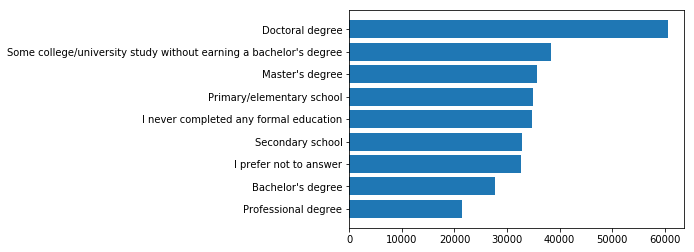

In [34]:
def barh_analysis(df, x_column, y_column):
    df_agg = df.groupby(x_column).mean()
    df_agg[x_column] = df_agg.index
    df_agg = df_agg.sort_values(by=y_column)
    x_range = range(0, len(df_agg[x_column]))

    plt.barh(x_range,df_agg[y_column]);
    plt.yticks(x_range, df_agg[x_column]);
    
barh_analysis(expected_salary_results, 'FormalEducation', 'ExpectedSalary')

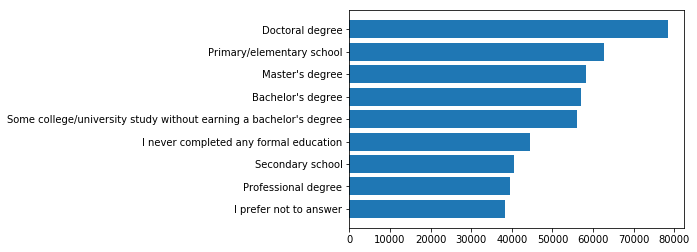

In [36]:
barh_analysis(salary_results, 'FormalEducation', 'Salary')

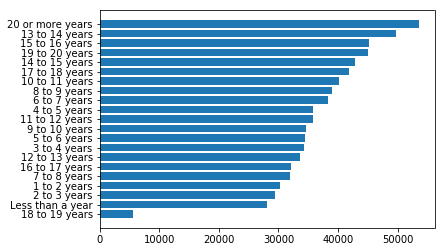

In [37]:
barh_analysis(expected_salary_results, 'YearsProgram', 'ExpectedSalary')

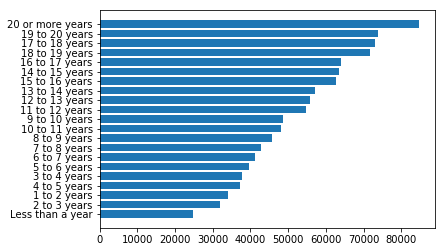

In [38]:
barh_analysis(salary_results, 'YearsProgram', 'Salary')

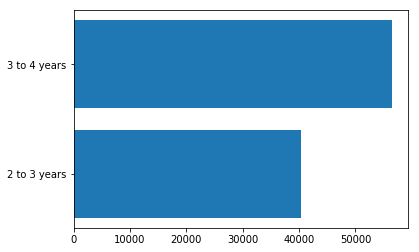

In [39]:
barh_analysis(expected_salary_results, 'YearsCodedJob', 'ExpectedSalary')

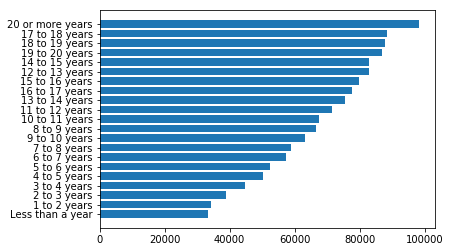

In [40]:
barh_analysis(salary_results, 'YearsCodedJob', 'Salary')

Interestingly, the expected salary does not seem to lign up with the coding experience (Years since first started programming). Also, years coded on job between professionals and people expecting a salary for a new job seem to align, let's dig deeper into that.

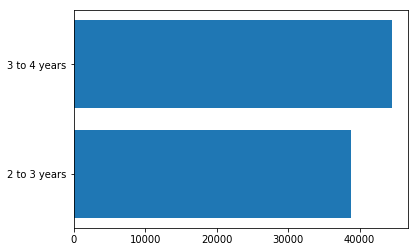

In [41]:
barh_analysis(salary_results[
    salary_results['YearsCodedJob'].isin([
        '2 to 3 years', '3 to 4 years'])], 'YearsCodedJob', 'Salary')

Comparing the results of professionals vs. people expecting to go into the field, shows that people are, compared to their experience overestimating the salary that they will receive.

## Job Satisfaction by Country / Job Grade

Let's have a final look into Job Satisfaction by country and job grade.

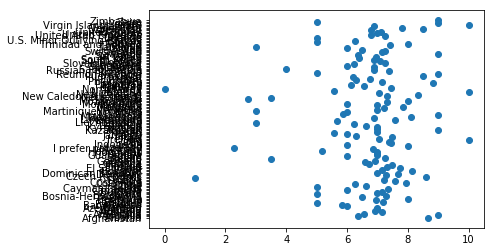

In [44]:
job_satisfaction_aggregate = salary_results.groupby('Country').mean()
plt.scatter(
    job_satisfaction_aggregate['JobSatisfaction'],
    job_satisfaction_aggregate.index);

That looks a bit messy, lets look at countries below 4 and above 8, showing extreme results

I prefer not to say    7
Nepal                  6
Myanmar                4
Ghana                  2
North Korea            1
Lesotho                1
Tanzania               1
Martinique (French)    1
Cuba                   1
Name: Country, dtype: int64

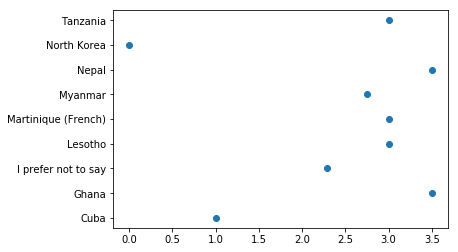

In [62]:
job_satisfaction_aggregate_low = job_satisfaction_aggregate[job_satisfaction_aggregate['JobSatisfaction'] < 4.0]

plt.scatter(
    job_satisfaction_aggregate_low['JobSatisfaction'],
    job_satisfaction_aggregate_low.index);

salary_results[salary_results['Country'].isin(list(job_satisfaction_aggregate_low.index))]['Country'].value_counts()

Macedonia                 10
Ecuador                    7
Paraguay                   6
Cyprus                     5
Puerto Rico                4
New Caledonia (French)     3
Afghanistan                3
Uzbekistan                 2
Anguilla                   1
Zimbabwe                   1
Madagascar                 1
Nicaragua                  1
Kazakhstan                 1
Suriname                   1
Iraq                       1
Qatar                      1
Yemen                      1
Virgin Islands (USA)       1
Name: Country, dtype: int64

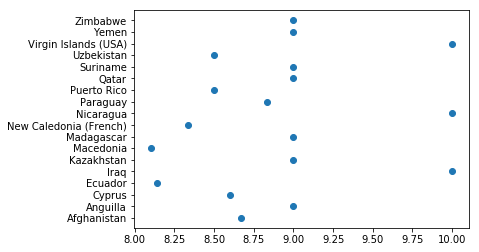

In [63]:
job_satisfaction_aggregate_high = job_satisfaction_aggregate[job_satisfaction_aggregate['JobSatisfaction'] > 8.0]

plt.scatter(
    job_satisfaction_aggregate_high['JobSatisfaction'],
    job_satisfaction_aggregate_high.index);

salary_results[salary_results['Country'].isin(list(job_satisfaction_aggregate_high.index))]['Country'].value_counts()

Although interesting, we can see that those results are very underrepresented in the dataset. Let's have a look at countries, which have a representation of at least 50 answers.

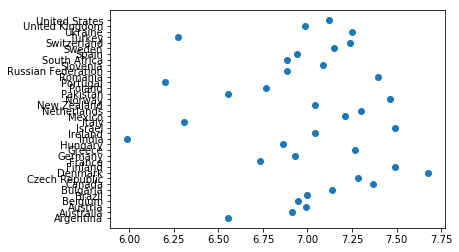

In [69]:
countries = salary_results['Country'].value_counts()
selected_countries = countries[countries.values > 50]

salary_results_selected = salary_results[salary_results['Country'].isin(selected_countries.index)]

job_satisfaction_selected_aggregate = salary_results_selected.groupby('Country').mean()
plt.scatter(
    job_satisfaction_selected_aggregate['JobSatisfaction'],
    job_satisfaction_selected_aggregate.index);

Overall Job satisfaction seems to be pretty good. Let's have a look at the low end of the spectrum.

India        819
Italy        201
Pakistan      76
Portugal      71
Turkey        69
Argentina     58
Name: Country, dtype: int64

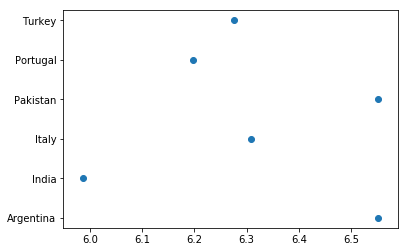

In [70]:
job_satisfaction_selected_aggregate_low = job_satisfaction_selected_aggregate[job_satisfaction_selected_aggregate['JobSatisfaction'] < 6.7]

plt.scatter(
    job_satisfaction_selected_aggregate_low['JobSatisfaction'],
    job_satisfaction_selected_aggregate_low.index);

salary_results[salary_results['Country'].isin(list(job_satisfaction_selected_aggregate_low.index))]['Country'].value_counts()

## Job Security

Let's also have a look at job security

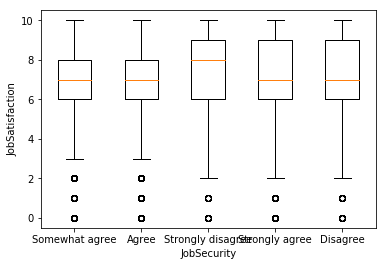

In [86]:
survey_results_security = survey_results.dropna(subset=['JobSecurity'])
survey_results_security = survey_results_security.dropna(subset=['JobSatisfaction'])
survey_results_security['JobSatisfaction'] = survey_results_security['JobSatisfaction'].astype(int)
surcey_retults
print_boxplots(survey_results_security, 'JobSecurity', 'JobSatisfaction')

Funnily enough, people without JOb security seem to be the happiest on average.